## Perform Kolmogorov-Smirnov Test

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy import stats
from functools import partial

In [9]:
# Set parameters
a,b,c = 0.1,1.5,-2.0

In [10]:
# Load all data
τ2_rejection_full_data = np.loadtxt("../data/%.6f_%.6f_%.6f_simpleTruncexpon_rejection.dat"%(a,b,c))
τ2_direct_full_data = np.loadtxt("../data/%.6f_%.6f_%.6f_simpleTruncexpon_direct.dat"%(a,b,c))

In [11]:
# Get total number of samples in data
num_samples_data = τ2_rejection_full_data.shape[0]
print("There are a total of %d samples in the full data set."%num_samples_data)

There are a total of 1000000 samples in the full data set.


In [12]:
# Set start index (i.e, how many samples will be thrownaway due to equilibration)
equil_percent = 0.2
start = int(num_samples_data*equil_percent)

print("The %d first samples will be thrown away for equilibration."%start)

The 200000 first samples will be thrown away for equilibration.


In [13]:
# Set number of desired samples to use
num_samples = num_samples_data-start

print("There are a total of %d samples left in the data set after equilibration."%(num_samples))

There are a total of 800000 samples left in the data set after equilibration.


In [14]:
τ2_rejection = τ2_rejection_full_data[start:]
τ2_direct = τ2_direct_full_data[start:]

In [19]:
def P(τ,a,b,c):
    Z = (np.exp(c*(b-a))-1)/c
    return (1/Z)*np.exp(c*(τ-a));

def cdf(τ,a,b,c):
    Z = (np.exp(c*(b-a))-1)/c
    return (np.exp(c*(τ-a))-1)/(c*Z)

def P_times_tau(τ,a,b,c):
    Z = (np.exp(c*(b-a))-1)/c
    return τ*(1/Z)*np.exp(c*(τ-a));

In [24]:
cdf_fixed = partial(cdf,a=a,b=b,c=c)

In [25]:
# Compute kstest as a function of sample number
num_samples_rejection = 100000
num_samples_direct = 100000

In [26]:
pvalues_rejection = np.zeros(num_samples_rejection)
pvalues_direct = np.zeros(num_samples_direct)

In [27]:
ksvalues_rejection = np.zeros(num_samples_rejection)
ksvalues_direct = np.zeros(num_samples_direct)

In [28]:
%%time
for i in range(num_samples_rejection):
    if i%10000==0: print("%d/%d"%(i,num_samples_rejection))
    
    ksvalues_rejection[i],pvalues_rejection[i] = stats.kstest(τ2_rejection[:i+1],cdf_fixed)

    ksvalues_direct[i],pvalues_direct[i] = stats.kstest(τ2_direct[:i+1],cdf_fixed)
    

0/100000
10000/100000
20000/100000
30000/100000
40000/100000
50000/100000
60000/100000
70000/100000
80000/100000
90000/100000
CPU times: user 1h 49min 23s, sys: 32.8 s, total: 1h 49min 56s
Wall time: 1h 50min 42s


In [29]:
stats.kstest(τ2_rejection[:100],cdf_fixed)

KstestResult(statistic=0.39260114216210185, pvalue=2.1164736531609455e-14)

In [30]:
# Write sample number, KS-statistic and p values to file
filename_rejection = "../processed_data/%.6f_%.6f_%.6f_simpleTruncexpon_rejection_ksTest.dat"%(a,b,c)
file_rejection = open(filename_rejection,"w")
header = "# ks-value      p-value \n"
file_rejection.write(header)
for i,ks in enumerate(ksvalues_rejection):
    file_rejection.write("%.12f %.12f \n"%(ksvalues_rejection[i],pvalues_rejection[i]))

filename_direct = "../processed_data/%.6f_%.6f_%.6f_simpleTruncexpon_direct_ksTest.dat"%(a,b,c)
file_direct = open(filename_direct,"w")
header = "# ks-value      p-value \n"
file_direct.write(header)
for i,ks in enumerate(ksvalues_direct):
    file_direct.write("%.12f %.12f \n"%(ksvalues_direct[i],pvalues_direct[i]))
    
file_rejection.close()
file_direct.close()

In [31]:
ksvalues_rejection = np.loadtxt("../processed_data/%.6f_%.6f_%.6f_simpleTruncexpon_rejection_ksTest.dat"%(a,b,c))[:,0]
ksvalues_direct = np.loadtxt("../processed_data/%.6f_%.6f_%.6f_simpleTruncexpon_direct_ksTest.dat"%(a,b,c))[:,0] 

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


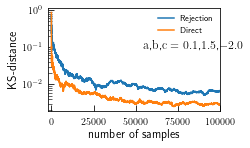

In [32]:
with plt.style.context('../IOP_large.mplstyle'):

    fig,ax = plt.subplots()

    ax.set_yscale("log")

    ax.plot(range(num_samples_rejection),ksvalues_rejection,label='Rejection')
    ax.plot(range(num_samples_direct),ksvalues_direct,label='Direct')
    ax.axhline(0.0,color="#aaaaaa",zorder=-10)
    ax.set_ylabel("KS-distance")
    ax.tick_params(direction='in',which='both')
    ax.set_xlim(-2000,100000)
    ax.set_xlabel("number of samples")

    ax.annotate(r"$\rm{a}$,$\rm{b}$,$\rm{c} = %.1f$,$%.1f$,$%.1f$"%(a,b,c),(0.55,0.60),
                    xycoords='axes fraction',fontsize=12)

    ax.legend(frameon=False,fontsize=8)

    plt.savefig("../figures/%.6f_%.6f_%.6f_simpleTruncexpon_ksTest.pdf"%(a,b,c),dpi=300)
    plt.savefig("/Users/ecasiano/Desktop/papers-truncExponSampling/figures/%.6f_%.6f_%.6f_simpleTruncexpon_ksTest.pdf"%(a,b,c),dpi=300)